In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import subprocess

from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score


from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV


from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB 

from mlxtend.classifier import StackingClassifier

subprocess.Popen(['ls', '-l'], stdout=subprocess.PIPE).communicate()[0]
pd.set_option('display.max_rows', 351)
df = pd.read_csv('data.csv')

print(df.shape)

print(df.describe())

print(df.info())

(347, 17)
              Age
count  347.000000
mean    35.374640
std      8.966105
min      0.000000
25%     28.000000
50%     34.000000
75%     41.000000
max     64.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Self-employed              347 non-null    bool  
 1   no_employees               299 non-null    object
 2   tech_company               299 non-null    object
 3   benefits                   299 non-null    object
 4   seeking_help_resources     299 non-null    object
 5   mental_health_consequence  299 non-null    object
 6   leave                      299 non-null    object
 7   mental_vs_physical         299 non-null    object
 8   supervisor                 299 non-null    object
 9   mental_health_interview    347 non-null    object
 10  treatment                  347 non-null    bool  
 11  fam

In [2]:
print(df.columns)

Index(['Self-employed', 'no_employees', 'tech_company', 'benefits',
       'seeking_help_resources', 'mental_health_consequence', 'leave',
       'mental_vs_physical', 'supervisor', 'mental_health_interview',
       'treatment', 'family_history', 'work_interfere',
       'physical_health_interview', 'Age', 'Gender', 'Country'],
      dtype='object')


In [3]:
df = df[['Self-employed', 'no_employees', 'tech_company', 'benefits',
       'seeking_help_resources', 'mental_health_consequence', 'leave',
       'mental_vs_physical', 'supervisor', 'work_interfere',
       'mental_health_interview', 'treatment', 'family_history',
        'physical_health_interview',
       'Age', 'Gender', 'Country']]

In [4]:
print(df.columns)

Index(['Self-employed', 'no_employees', 'tech_company', 'benefits',
       'seeking_help_resources', 'mental_health_consequence', 'leave',
       'mental_vs_physical', 'supervisor', 'work_interfere',
       'mental_health_interview', 'treatment', 'family_history',
       'physical_health_interview', 'Age', 'Gender', 'Country'],
      dtype='object')


In [5]:
df.isnull().sum().max()
df.head(5)

,Self-employed,no_employees,tech_company,benefits,seeking_help_resources,mental_health_consequence,leave,mental_vs_physical,supervisor,work_interfere,mental_health_interview,treatment,family_history,physical_health_interview,Age,Gender,Country
0,False,26-100,True,I don't know,Yes,I don't know,Very easy,Physical health,Yes,Not applicable to me,Don't Know,False,No,Yes,25,Male,United States of America
1,False,26-100,True,Yes,Yes,Yes,I don't know,Physical health,Maybe,Often,Possibly,False,Yes,No,51,male,United States of America
2,False,26-100,True,I don't know,I don't know,I don't know,Somewhat difficult,Same level of comfort for each,No,Not applicable to me,No,False,I don't know,Maybe,27,Male,United States of America
3,False,100-500,True,I don't know,Yes,Yes,Very easy,Physical health,Yes,Not applicable to me,No,False,Yes,No,37,male,United States of America
4,False,26-100,True,I don't know,I don't know,I don't know,I don't know,Physical health,No,Not applicable to me,No,False,No,No,46,m,United States of America


In [6]:
defInt = 0
defStr = 'NaN'
defFloat = 0.0

intFeatures = ['Age']
stringFeatures = ['Self-employed', 'no_employees', 'tech_company', 'benefits',
       'seeking_help_resources', 'mental_health_consequence', 'leave',
       'mental_vs_physical', 'supervisor', 'work_interfere',
       'mental_health_interview', 'treatment', 'family_history',
       'work_interfere.1', 'physical_health_interview',
       'mental_health_interview.1', 'Gender', 'Country']

floatFeatures=[]
for f in df:
    if f in intFeatures:
        df[f] = df[f].fillna(defInt)
    elif f in stringFeatures:
        df[f] = df[f].fillna(defStr)
    elif f in floatFeatures:
        df[f] = df[f].fillna(defFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
df.head(20)
    

,Self-employed,no_employees,tech_company,benefits,seeking_help_resources,mental_health_consequence,leave,mental_vs_physical,supervisor,work_interfere,mental_health_interview,treatment,family_history,physical_health_interview,Age,Gender,Country
0,False,26-100,True,I don't know,Yes,I don't know,Very easy,Physical health,Yes,Not applicable to me,Don't Know,False,No,Yes,25,Male,United States of America
1,False,26-100,True,Yes,Yes,Yes,I don't know,Physical health,Maybe,Often,Possibly,False,Yes,No,51,male,United States of America
2,False,26-100,True,I don't know,I don't know,I don't know,Somewhat difficult,Same level of comfort for each,No,Not applicable to me,No,False,I don't know,Maybe,27,Male,United States of America
3,False,100-500,True,I don't know,Yes,Yes,Very easy,Physical health,Yes,Not applicable to me,No,False,Yes,No,37,male,United States of America
4,False,26-100,True,I don't know,I don't know,I don't know,I don't know,Physical health,No,Not applicable to me,No,False,No,No,46,m,United States of America
5,False,100-500,True,Yes,No,I don't know,Somewhat difficult,Physical health,No,Often,Yes,True,Yes,No,36,female,United States of America
6,False,26-100,True,Yes,I don't know,Yes,Somewhat easy,Physical health,Maybe,Sometimes,Yes,True,Yes,Yes,39,Female,United States of America
7,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sometimes,Possibly,True,Yes,Maybe,35,Male,United States of America
8,False,26-100,True,Yes,Yes,Yes,Very easy,Same level of comfort for each,Yes,Not applicable to me,No,False,No,Maybe,49,NaN,United Kingdom
9,False,6-25,True,I don't know,I don't know,I don't know,Somewhat easy,Same level of comfort for each,Yes,Sometimes,Possibly,True,I don't know,Maybe,45,Male,United Kingdom


In [7]:
gender = df['Gender'].str.lower()

In [8]:
print(df['Gender'].unique())

['Male' 'male' 'm' 'female' 'Female' 'NaN' 'M' 'F' 'Non-binary'
 'Identify as male' 'Male ' 'Woman' 'Non binary' 'Masculine' 'Cishet male'
 'None' 'Female-identified' 'woman' 'Nonbinary' 'agender' 'f' 'Man'
 'Questioning' 'cis male' 'Cis Male' 'I have a penis' 'rr' 'cis woman'
 'Agender trans woman' 'Female ' 'femmina' '43' 'Trans man' 'man'
 'masculino' 'I am a Wookie' 'Make' 'Trans non-binary/genderfluid'
 'CIS Male' 'Non-binary and gender fluid' 'Femile' 'Female (cis)']


In [9]:
gender = df['Gender'].str.lower()

gender = df['Gender'].unique()

male_str = ["male","m","Male ","M","Male","Identify as male","Masculine","Cishet male","Man","cis male","Cis male","I have a penis","man","masculino","Make","CIS Male",'male',"Identify as male","Masculine", "Cishet male","I have a penis",'Make','Masculine','Trans man','Identify as male',
           "male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]

female_str = ["female","Female","F","Woman","Female-identified","cis woman","Female ",
             "femmina","Femile","Female (cis)","f",'female','Woman','Female-identified','woman', 'Female-identified',
             'Female ','Femile','Female (cis)',"cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

trans_str = ["Non-binary","Non binary","Nonbinary","Questioning","Agender trans woman","agender","Trans man","Trans non-binary/genderfluid","Non-binary and gender fluid",'Non-binary','Non binary','Nonbinary','agender','Questioning','Agender trans woman','Trans non-binary/genderfluid','Non-binary and gender fluid',
            "trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]
bs =["NaN","None","63","rr", "31", "32","43","40","I am a Wookie"]

for (row, col) in df.iterrows():
    if str.lower(col.Gender) in male_str:
        df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)
        
    elif str.lower(col.Gender) in female_str:
        df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)
        
    elif str.lower(col.Gender) in trans_str:
        df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)
    else:
        df['Gender'].replace(to_replace=col.Gender, value='NaN', inplace=True)
        
df = df[~df['Gender'].isin(bs)]


In [10]:
df['Age'].fillna(df['Age'].median(),inplace=True)

s= pd.Series(df['Age'])
s[s<18] = df['Age'].median()
df['Age'] = s

s=pd.Series(df['Age'])
s[s>120] = df['Age'].median()
df['Age'] =s

df['age_range'] = pd.cut(df['Age'],[0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

In [11]:
print(df['work_interfere'].unique())

['Not applicable to me' 'Often' 'Sometimes' 'Rarely' 'Never']


In [12]:
df['work_interfere'] = df['work_interfere'].replace('Not applicable to me','Don\'t know' )

In [13]:
df = df.replace('False','No')
df=df.replace('FALSE','No')
df=df.replace('false','No')
df=df.replace('True','Yes')
df=df.replace('TRUE','Yes')
df=df.replace('true','Yes')
df = df.replace(False,'No')
df =  df.replace(True, 'Yes')

print(df['treatment'])

0       No
1       No
2       No
3       No
4       No
5      Yes
6      Yes
7      Yes
9      Yes
10     Yes
11      No
12     Yes
13     Yes
14     Yes
15      No
16     Yes
17      No
18      No
19     Yes
20      No
21     Yes
22     Yes
23     Yes
24     Yes
25      No
26     Yes
27     Yes
28      No
29     Yes
30      No
31      No
32     Yes
33      No
34      No
35     Yes
36      No
37     Yes
38      No
39     Yes
40      No
41     Yes
43     Yes
44     Yes
45     Yes
47      No
48      No
49     Yes
50     Yes
51      No
52     Yes
53      No
54     Yes
55     Yes
56      No
57      No
58     Yes
59     Yes
60      No
61     Yes
63      No
64      No
65     Yes
66     Yes
67     Yes
68     Yes
69      No
70      No
71     Yes
72     Yes
73      No
74     Yes
75     Yes
78      No
79     Yes
80     Yes
81      No
82      No
83      No
84     Yes
85      No
87     Yes
88     Yes
89     Yes
90     Yes
91     Yes
92      No
93     Yes
94     Yes
95     Yes
96     Yes
98      No

In [14]:
labelDict = {}

for f in df:
    le = preprocessing.LabelEncoder()
    le.fit(df[f])
    le_name_map = dict(zip(le.classes_,le.transform(le.classes_)))
    df[f] = le.transform(df[f])
    
    key = 'label_' + f
    val = [*le_name_map]
    labelDict[key] = val
    
for(key,val) in labelDict.items():
    print(key,val)
df = df.drop(['Country'],axis=1)


label_Self-employed ['No', 'Yes']
label_no_employees ['1-5', '100-500', '26-100', '500-1000', '6-25', 'More than 1000', 'NaN']
label_tech_company ['NaN', 'No', 'Yes']
label_benefits ["I don't know", 'NaN', 'No', 'Not eligible for coverage / NA', 'Yes']
label_seeking_help_resources ["I don't know", 'NaN', 'No', 'Yes']
label_mental_health_consequence ["I don't know", 'NaN', 'No', 'Yes']
label_leave ['Difficult', "I don't know", 'NaN', 'Neither easy nor difficult', 'Somewhat difficult', 'Somewhat easy', 'Very easy']
label_mental_vs_physical ['Mental health', 'NaN', 'Physical health', 'Same level of comfort for each']
label_supervisor ['Maybe', 'NaN', 'No', 'Yes']
label_work_interfere ["Don't know", 'Never', 'Often', 'Rarely', 'Sometimes']
label_mental_health_interview ["Don't Know", 'No', 'Possibly', 'Yes']
label_treatment ['No', 'Yes']
label_family_history ["I don't know", 'No', 'Yes']
label_physical_health_interview ['Maybe', 'No', 'Yes']
label_Age [19, 20, 21, 22, 23, 24, 25, 26, 27, 2

In [15]:
df.head()

,Self-employed,no_employees,tech_company,benefits,seeking_help_resources,mental_health_consequence,leave,mental_vs_physical,supervisor,work_interfere,mental_health_interview,treatment,family_history,physical_health_interview,Age,Gender,age_range
0,0,2,2,0,3,0,6,2,3,0,0,0,1,2,6,1,1
1,0,2,2,4,3,3,1,2,0,2,2,0,2,1,32,1,2
2,0,2,2,0,0,0,4,3,2,0,1,0,0,0,8,1,1
3,0,1,2,0,3,3,6,2,3,0,1,0,2,1,18,1,2
4,0,2,2,0,0,0,1,2,2,0,1,0,1,1,27,1,2


In [16]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
md = pd.concat([total,percent], axis =1, keys=['Total',"Percent"])
md.head(20)
print(md)

                           Total  Percent
age_range                      0      0.0
mental_vs_physical             0      0.0
no_employees                   0      0.0
tech_company                   0      0.0
benefits                       0      0.0
seeking_help_resources         0      0.0
mental_health_consequence      0      0.0
leave                          0      0.0
supervisor                     0      0.0
Gender                         0      0.0
work_interfere                 0      0.0
mental_health_interview        0      0.0
treatment                      0      0.0
family_history                 0      0.0
physical_health_interview      0      0.0
Age                            0      0.0
Self-employed                  0      0.0


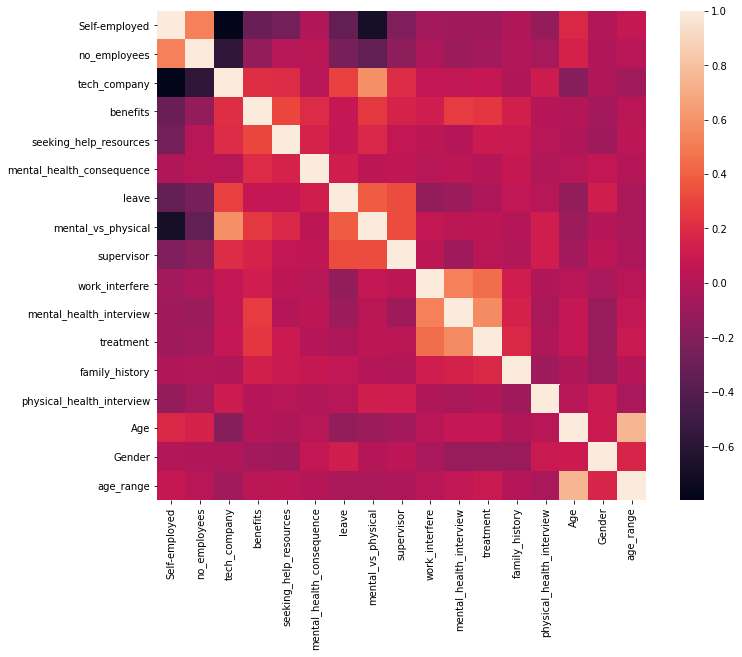

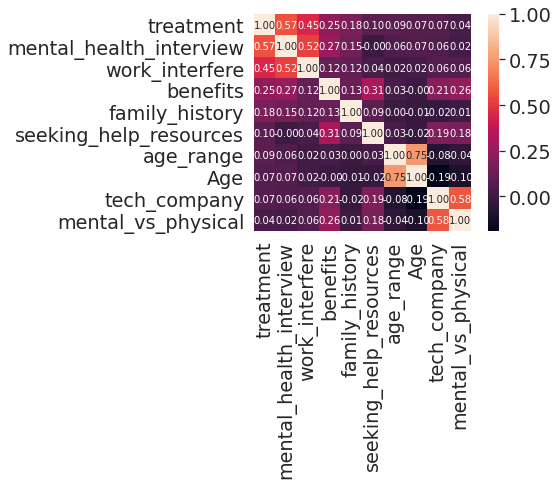

In [17]:
corrmat = df.corr()
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=1, square=True)
plt.show()

k=10
cols = corrmat.nlargest(k,'treatment')['treatment'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.75)
hm = sns.heatmap(cm,cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels = cols.values)
plt.show()

Text(0.5, 0, 'Ages')

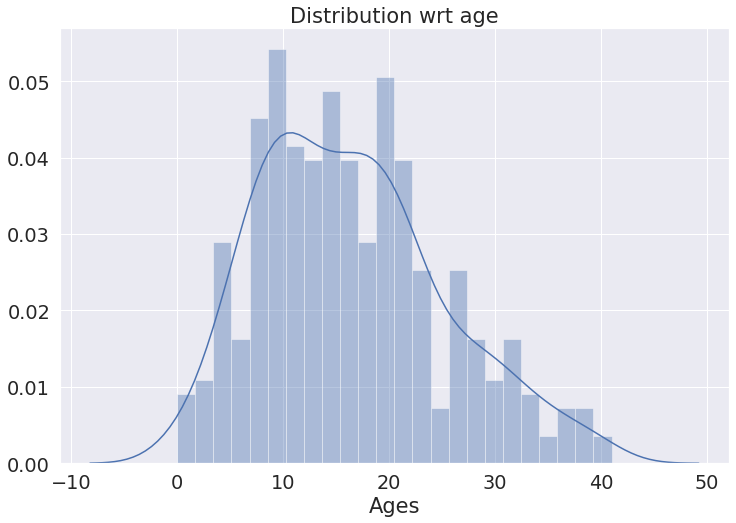

In [18]:
plt.figure(figsize=(12,8))
sns.distplot(df["Age"], bins=24)
plt.title("Distribution wrt age")
plt.xlabel("Ages")

/home/shreya/CSE474/milestone2/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


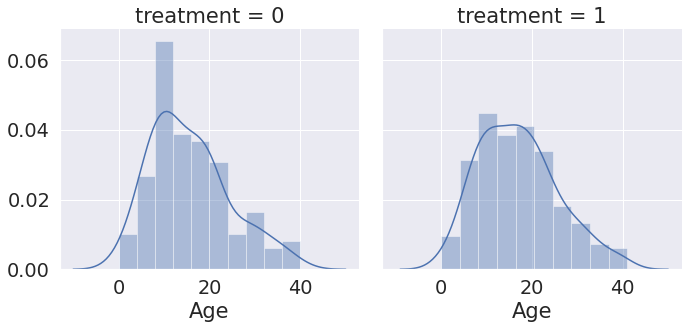

In [19]:
g = sns.FacetGrid(df, col='treatment', size=5)
g = g.map(sns.distplot, "Age")

/home/shreya/CSE474/milestone2/lib/python3.6/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/shreya/CSE474/milestone2/lib/python3.6/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


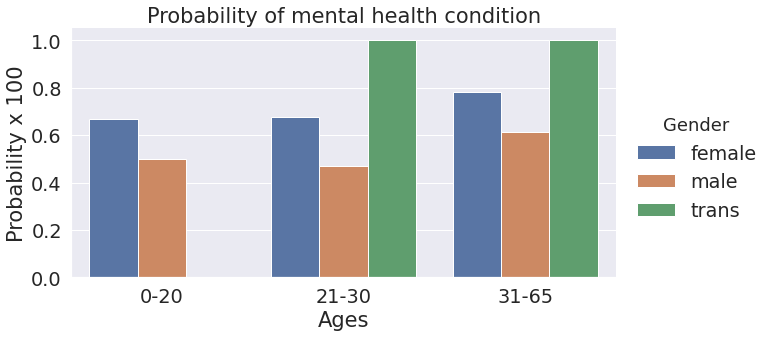

In [20]:
o = labelDict['label_age_range']
g  = sns.factorplot(x="age_range", y="treatment", hue="Gender", data=df, kind="bar",
                   ci=None, size=5, aspect=2, legend_out=True)
g.set_xticklabels(o)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Ages')

new_labels = labelDict['label_Gender']
for t,l  in zip(g._legend.texts, new_labels): t.set_text(l)
    
g.fig.subplots_adjust(top=0.9, right=0.8)
plt.show()

In [21]:
scaler = MinMaxScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
df.head()

,Self-employed,no_employees,tech_company,benefits,seeking_help_resources,mental_health_consequence,leave,mental_vs_physical,supervisor,work_interfere,mental_health_interview,treatment,family_history,physical_health_interview,Age,Gender,age_range
0,0,2,2,0,3,0,6,2,3,0,0,0,1,2,0.146341,1,1
1,0,2,2,4,3,3,1,2,0,2,2,0,2,1,0.780488,1,2
2,0,2,2,0,0,0,4,3,2,0,1,0,0,0,0.195122,1,1
3,0,1,2,0,3,3,6,2,3,0,1,0,2,1,0.439024,1,2
4,0,2,2,0,0,0,1,2,2,0,1,0,1,1,0.658537,1,2


In [22]:
feature_cols = ['Age','Gender','seeking_help_resources','tech_company','family_history', 'benefits','leave', 'work_interfere']
X = df[feature_cols]
y = df.treatment

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=0)


methodDict={
}

rmseDict = ()

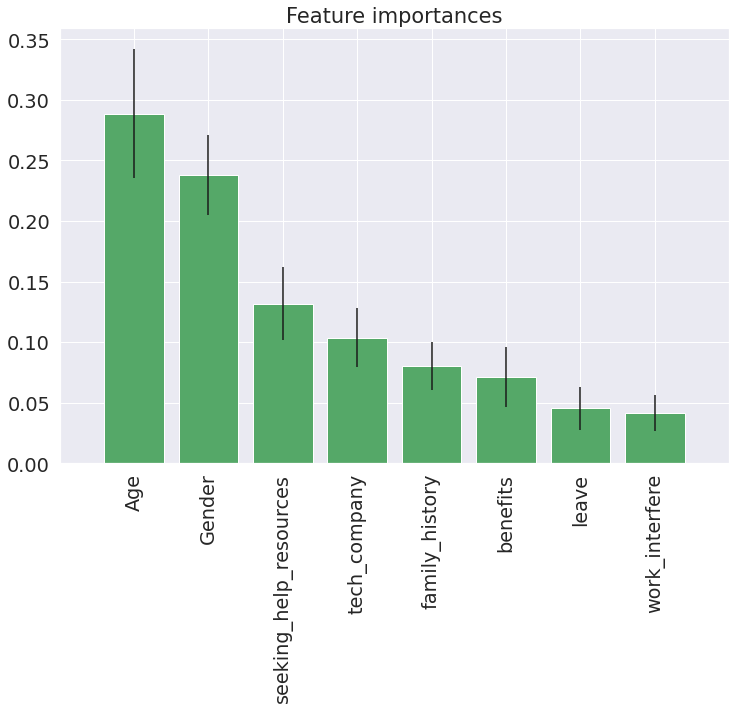

In [23]:
forest = ExtraTreesClassifier(n_estimators=350, random_state=0)
forest.fit(X,y)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

labels=[]
for f in range(X.shape[1]):
    labels.append(feature_cols[f])
    
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

def evalClassModel(model, y_test, y_pred_class, plot=False):
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
    
    print('Null accuracy:\n', y_test.value_counts())
    
    print('Percentage of ones:', y_test.mean())
    
    print('Percentage of zeroes:', 1 - y_test.mean())
    
    print('True values:', y_test.values[0:25])
    print('Predicted values:', y_pred_class[0:25])
    
#confusion matrix generation
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    
    TP = confusion[1,1]
    TN = confusion[0,0]
    FP = confusion[0,1]
    FN = confusion[1,0]
    
    sns.heatmap(confusion, annot=True, fmt="d")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)
    
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))

    false-positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)
    
    print('Precision:', metrics.precision_score(y_test, y_pred_class))
    
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))
    
    print('Cross-validated AUC:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())
    
    print('First 10 predicted response:\n', model.predict(X_test)[0:10])
    
    print('First 10 predicted probabilities of class members:\n', model.predict_proba(X_test)[0:10])
    
    model.predict_proba(X_test)[0:10,1]
    
    y_pred_prob = model.predict_proba(X_test)[:,1]
    if plot==True:
        
        plt.rcParams['font.size'] = 12
        
        plt.hist(y_pred_prob, bins=8)
        
        plt.xlim(0,1)
        
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')
        
        y_pred_prob = y_pred_prob.reshape(-1,1)
        y_pred_class = binarize(y_pred_prob, 0.3)[0]
        
        
        print('First 10 predicted probabilities:\n', y_pred_prob[0:10])
        
        roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
        
        falsposrate, trueposrate, thresholds = metrics.roc_curve(y_test, y_pred_prob)
        if plot == True:
            plt.figure()
            
            plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area=%0.2f)' %roc_auc)
            
            plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.0])
            plt.rcParams['font.size'] = 12
            plt.title('ROC curve for treatment classifier')
            plt.xlabel('False Positive Rate (1 - Specificity)')
            plt.ylabel('True Positive Rate (Sensitivity)')
            plt.legend(loc="lower right")
            plt.show()
            
def evaluate_threshold(threshold):
   

In [24]:
def evalClassModel(model, y_test, y_pred_class, plot=False): 
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))

    print('Null accuracy:\n', y_test.value_counts())

    print('Percentage of ones:', y_test.mean())

    print('Percentage of zeroes:', 1 - y_test.mean())

    print('True values:', y_test.values[0:25])
    print('Predicted values:', y_pred_class[0:25])

#confusion matrix generation 
    confusion = metrics.confusion_matrix(y_test, y_pred_class)

    TP = confusion[1,1]
    TN = confusion[0,0]
    FP = confusion[0,1]
    FN = confusion[1,0]

    sns.heatmap(confusion, annot=True, fmt="d")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)

    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))

    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)

    print('Precision:', metrics.precision_score(y_test, y_pred_class))

    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))

    print('Cross-validated AUC:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())

    print('First 10 predicted response:\n', model.predict(X_test)[0:10])

    print('First 10 predicted probabilities of class members:\n', model.predict_proba(X_test)[0:10])

    model.predict_proba(X_test)[0:10,1]

    y_pred_prob = model.predict_proba(X_test)[:,1]
    if plot==True:

        plt.rcParams['font.size'] = 12

        plt.hist(y_pred_prob, bins=8)

        plt.xlim(0,1)

        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')

    y_pred_prob = y_pred_prob.reshape(-1,1)
    y_pred_class = binarize(y_pred_prob, 0.3)[0]


    print('First 10 predicted probabilities:\n', y_pred_prob[0:10])

    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    
    falseposrate, trueposrate, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot == True:
        plt.figure()

        plt.plot(falseposrate, trueposrate, color='darkorange', label='ROC curve (area=%0.2f)' %roc_auc)

        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()

    def evaluate_threshold(threshold):
        print('Specificity for ' + str(threshold) + ' :', 1 - falseposrate[thresholds > threshold][-1])
    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)
    
    
    
    return accuracy

In [25]:
def logisticRegression():
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    y_pred_class = logreg.predict(X_test)
    print("------------------Logistic Regression -----------------")
    
    accuracy_score = evalClassModel(logreg, y_test, y_pred_class, True)
    methodDict['Log. Regres.'] = accuracy_score * 100

------------------Logistic Regression -----------------
Accuracy: 0.8061224489795918
Null accuracy:
 1    61
0    37
Name: treatment, dtype: int64
Percentage of ones: 0.6224489795918368
Percentage of zeroes: 0.37755102040816324
True values: [1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1]
Predicted values: [1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0]


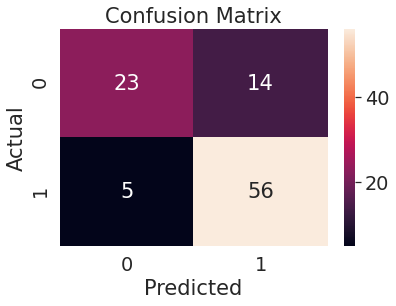

Classification Accuracy: 0.8061224489795918
Classification Error: 0.19387755102040816
False Positive Rate: 0.3783783783783784
Precision: 0.8
AUC Score: 0.7698272042534338
Cross-validated AUC: 0.7843086080586079
First 10 predicted response:
 [1 0 1 0 1 1 1 1 1 1]
First 10 predicted probabilities of class members:
 [[0.44867034 0.55132966]
 [0.50651381 0.49348619]
 [0.20074349 0.79925651]
 [0.68611042 0.31388958]
 [0.0523858  0.9476142 ]
 [0.06054806 0.93945194]
 [0.03128095 0.96871905]
 [0.3191998  0.6808002 ]
 [0.31289975 0.68710025]
 [0.02873237 0.97126763]]
First 10 predicted probabilities:
 [[0.55132966]
 [0.49348619]
 [0.79925651]
 [0.31388958]
 [0.9476142 ]
 [0.93945194]
 [0.96871905]
 [0.6808002 ]
 [0.68710025]
 [0.97126763]]


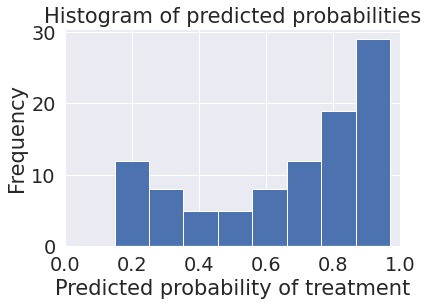

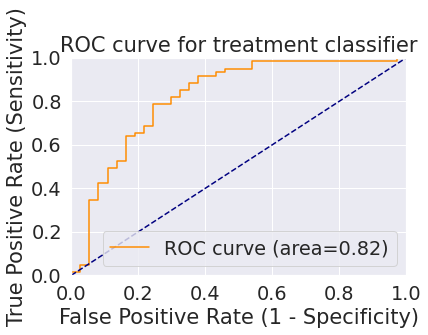

[[23 14]
 [ 5 56]]


In [26]:
logisticRegression()